<a href="https://colab.research.google.com/github/Reennon/gen-ai-cv-lab-1/blob/main/notebooks/vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VAE CIFAR-10 Training and Experimentation

This notebook demonstrates training VAE model on the CIFAR-10 dataset using a modular training pipeline implemented in PyTorch Lightning.


In [21]:
!git clone https://github.com/Reennon/gen-ai-cv-lab-1.git
%cd gen-ai-cv-lab-1

Cloning into 'gen-ai-cv-lab-1'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 158 (delta 56), reused 126 (delta 33), pack-reused 0 (from 0)
Receiving objects: 100% (158/158), 162.10 KiB | 873.00 KiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/gen-ai-cv-lab-1/gen-ai-cv-lab-1


In [22]:
!pip install -r requirements.txt

In [23]:
!git pull

Already up to date.


In [24]:
import os
import dotenv
import wandb
import torch

from omegaconf import OmegaConf
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from google.colab import userdata
from matplotlib import pyplot as plt

from src.visualization.vae_visualizer import VAEVisualizer
from src.training.trainer import train_model
from src.models.vae import VAE


In [25]:
os.environ["WANDB_KEY"] = userdata.get("wandb_key")
!echo $WANDB_KEY >> .env

In [26]:
dotenv.load_dotenv()

True

In [27]:
parameters = OmegaConf.load("./params/autoencoder.yml")
wandb.login(key=os.environ["WANDB_KEY"])

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [28]:
wandb_project_name = "cifar-10-vae"
device = "gpu"

In [29]:
# Define data transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

# Load datasets
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
val_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)


100%|██████████| 170M/170M [00:03<00:00, 43.0MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [30]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(-1.) tensor(1.)


In [31]:
images.shape

torch.Size([64, 3, 32, 32])

In [32]:
hparams = parameters.hyperparameters

In [33]:
# Edit hparams dict here as experiemnt, wandb will log the difference
hparams["lr"] = 1e-4
hparams["epochs"] = 20
hparams['latent_dim'] = 48

parameters.run_parameters.experiment_name = f"vae-poly-scheduler-{hparams['latent_dim']}-lr-{hparams['lr']}-epochs-{hparams['epochs']}"

dict(hparams)

{'lr': 0.0001,
 'epochs': 30,
 'latent_dim': 96,
 'scheduler': {'type': 'PolynomialLR', 'params': {'total_iters': 20, 'power': 1.0}},
 'optimizer': {'type': 'Adam'}}

In [34]:
wandb.finish()

In [35]:
# Train the Autoencoder
model = train_model(VAE, parameters, train_loader, val_loader, wandb_project_name)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type       | Params | Mode 
--------------------------------------------------
0 | encoder    | Sequential | 658 K  | train
1 | fc_mu      | Linear     | 393 K  | train
2 | fc_logvar  | Linear     | 393 K  | train
3 | decoder_fc | Linear     | 397 K  | train
4 | decoder    | Sequential | 658 K  | train
--------------------------------------------------
2.5 M     Trainable params
0         Non-trainable params
2.5 M     Total params
10.006    Total estimated model params size (MB)
19        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


In [36]:
# Visualize metrics from wandb
from IPython.display import display
wandb_url = wandb.run.get_url()
display(f"Wandb Dashboard: {wandb_url}")


'Wandb Dashboard: https://wandb.ai/rkovalchuk/cifar-10-vae/runs/n21a65an'

In [37]:
wandb.finish()

epoch,▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇█████
kld_loss,█▁▁▂▃▄▆▅▇▅▅▆▆▅▅▅▇▅▆▆▅▆▅▆▆▆▅▆▅▅▇▆▆▅▅▅▅▇▆▅
learning_rate,██▇▇▇▆▆▆▅▅▅▄▄▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁
recon_loss,█▇▆▄▄▄▅▃▄▄▂▁▁▂▅▄▃▃▄▅▄▄▃▃▃▂▄▃▅▅▃▄▃▃▃▆▂▅▃▃
train_loss,█▅▄▃▂▃▅▂▃▃▁▂▂▃▂▂▁▃▄▄▂▁▃▂▂▃▄▄▂▂▂▂▂▃▂▃▄▂▄▃
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇██
val_kld_loss,▁▃▄▅▆▇▇▇█▇██▇█▇███████████████
val_loss,█▅▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_recon_loss,█▅▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,29
kld_loss,35.98246


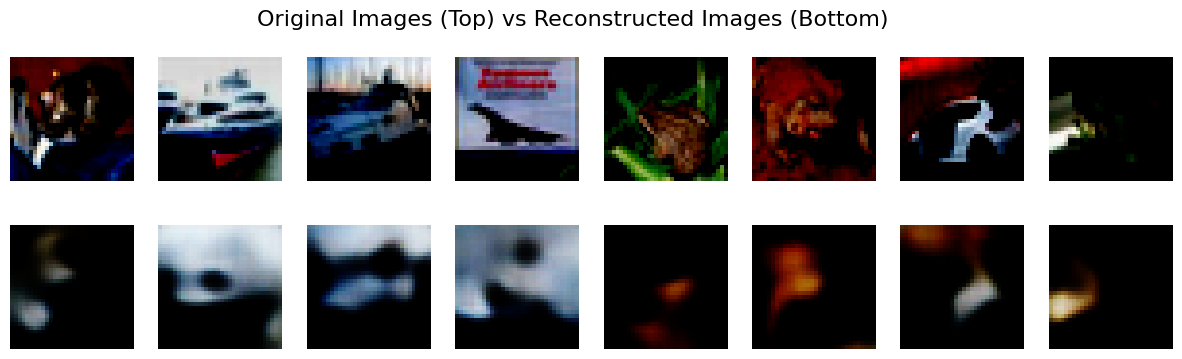

In [42]:
# Load the model
model.eval()

# Visualize original and reconstructed images
visualizer = VAEVisualizer(model, val_loader)
visualizer.visualize_reconstructions()